**Getting to Visualising the Stock Market Prediction Data**    
Using the Pandas Data Reader library, we will upload the stock data from the local system as a Comma Separated Value (.csv) file and save it to a pandas DataFrame. Finally, we will examine the data.

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import plot_model


**Getting to Visualising the Stock Market Prediction Data**

Using the Pandas Data Reader library, we will upload the stock data from the local system as a Comma Separated Value (.csv) file and save it to a pandas DataFrame. Finally, we will examine the data.

In [19]:
df=pd.read_csv("MicrosoftStock.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-19-94db3771b828>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("MicrosoftStock.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)


,index,open,high,low,close,volume,Name
date,,,,,,,
2013-02-08,390198,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,390199,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,390200,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,390201,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,390202,27.92,28.06,27.87,28.04,32663174,MSFT


**Checking for Null Values by Printing the DataFrame Shape**

In this step, firstly, we will print the structure of the dataset. We’ll then check for null values in the data frame to ensure that there are none. The existence of null values in the dataset causes issues during training since they function as outliers, creating a wide variance in the training process.

In [20]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1259, 7)
Null Value Present:  False


**Setting the Target Variable and Selecting the Features**

The output column is then assigned to the target variable in the following step. It is the adjusted relative value of Microsoft Stock in this situation. Furthermore, we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:

*   Open
*   High
*   Low
*   Volume

In [28]:
output_var = pd.DataFrame(df['close'])
#Selecting the Features
features = ['open', 'high', 'low', 'volume']

 **Scaling**

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased. Also, because the data is not spread out in huge values, we can achieve greater precision by scaling down. To perform this, we will be using the MinMaxScaler class of the sci-kit-learn library.

In [29]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.000000,0.001607,0.001203,0.107470
2013-02-11,0.004425,0.004674,0.004061,0.103026
2013-02-12,0.007818,0.005842,0.007821,0.118563
2013-02-13,0.008556,0.007449,0.009776,0.142324
2013-02-14,0.008408,0.006718,0.009626,0.104751


**Creating a Training Set and a Test Set for Stock Market Prediction**

Before inputting the entire dataset into the training model, we need to partition it into training and test sets. The Machine Learning LSTM model will undergo training using the data in the training set, and its accuracy and backpropagation will be tested against the test set.

To accomplish this, we will employ the TimeSeriesSplit class from the sci-kit-learn library. We will configure the number of splits to be 10, indicating that 10% of the data will serve as the test set, while the remaining 90% will train the LSTM model. The advantage of employing this Time Series split lies in its examination of data samples at regular time intervals.

In [30]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train = feature_transform[:len(train_index)]
    X_test = feature_transform[len(train_index):(len(train_index) + len(test_index))]
    y_train = output_var[:len(train_index)].values.ravel()
    y_test = output_var[len(train_index):(len(train_index) + len(test_index))].values.ravel()

**Data Processing For LSTM**

Once the training and test sets are finalized, we will input the data into the LSTM model. Before we can do that, we must transform the training and test set data into a format that the LSTM model can interpret. As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). Now, 6667 are the number of samples in the training set, which is 90% of 7334, and the number of features is 4. Therefore, the training set is reshaped to reflect this (6667, 1, 4). Likewise, the test set is reshaped.

In [31]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])

**Building the LSTM Model for Stock Market Prediction**

Finally, we arrive at the point when we construct the LSTM Model. In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. The model is plotted and presented below.

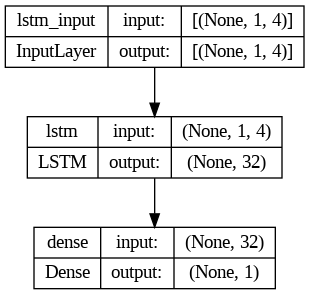

In [33]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

 **Training the Stock Market Prediction Model**

Finally, we use the fit function to train the LSTM model created above on the training data for 100 epochs with a batch size of 8.

In [34]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 2s 3ms/step - loss: 2390.9214
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 2234.5322
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 1909.6179
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 1438.6334
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 934.2106
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 513.2173
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 234.7257
Epoch 8/100
144/144 [==============================] - 0s 3ms/step - loss: 90.2165
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 32.3239
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 14.2752
Epoch 11/100
144/144 [==============================] - 0s 3ms/step - loss: 9.5739
Epoch 12/100
144/144 [==============================] - 0s 2ms/step - loss:

**Making the LSTM Prediction**

Now that we have our model ready, we can use it to forecast the Adjacent Close Value of the Microsoft stock by using a model trained using the LSTM network on the test set. We can accomplish this by employing simple prediction model on the LSTM model

In [35]:
y_pred= lstm.predict(X_test)

4/4 [==============================] - 0s 4ms/step


**Comparing Predicted vs True Adjusted Close Value – LSTM**

Finally, now that we’ve projected the values for the test set, we can display the graph to compare both Adj Close’s true values and Adj Close’s predicted value using the LSTM Machine Learning model.

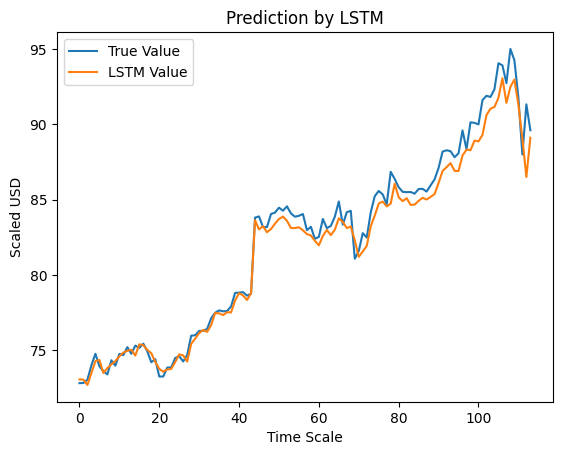

In [36]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()